# Email Spam Classification

## Project Preparation

Import libraries

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

Load the dataset

In [2]:
df = pd.read_csv("dataset/spam.csv")
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
X = df.iloc[:, 1:2]
y = df.iloc[:, 0:1]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.20, random_state=42)

In [5]:
X_train

,v2
1978,No I'm in the same boat. Still here at my moms...
3989,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3935,They r giving a second chance to rahul dengra.
4078,O i played smash bros &lt;#&gt; religiously.
4086,PRIVATE! Your 2003 Account Statement for 07973...
...,...
3772,I came hostel. I m going to sleep. Plz call me...
5191,"Sorry, I'll call later"
5226,Prabha..i'm soryda..realy..frm heart i'm sory
5390,Nt joking seriously i told


Feature Extraction

In [6]:
vectorizer = CountVectorizer()

## Model Training

In [7]:
clf_method = KNeighborsClassifier()

clf = Pipeline([
     ('vectorizer', vectorizer),
     ('classifier', clf_method)
 ])

clf.fit(X_train.values.ravel(), y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', KNeighborsClassifier())])

In [13]:
y_train_pred = clf.predict(X_train.values.ravel())

print(f"Train Accuracy= {accuracy_score(y_train, y_train_pred):.3f}")

Train Accuracy= 0.932


In [14]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         ham       0.93      1.00      0.96      3860
        spam       1.00      0.49      0.66       597

    accuracy                           0.93      4457
   macro avg       0.96      0.74      0.81      4457
weighted avg       0.94      0.93      0.92      4457



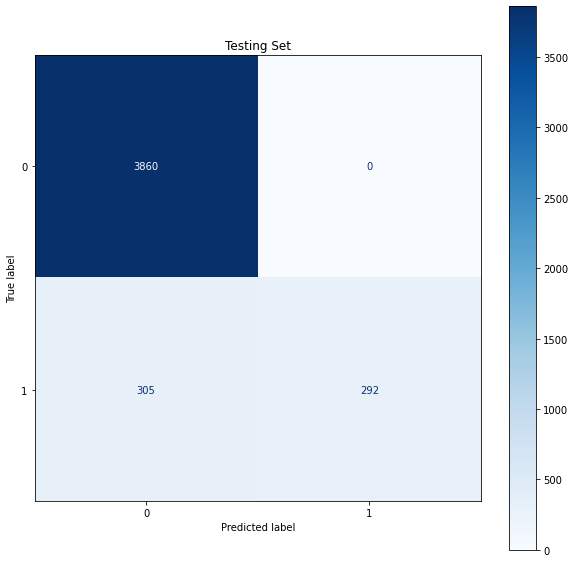

In [19]:
conf_mat_train = ConfusionMatrixDisplay(confusion_matrix(y_train, y_train_pred))

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Testing Set')
conf_mat_train.plot(cmap=plt.cm.Blues, ax=ax);